In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
in_csv = 'data.csv'
number_lines = 420444
rowsize = 210222
for i in range(1,number_lines,rowsize):
    df = pd.read_csv(in_csv,
          header=None,
          nrows = rowsize,#number of rows to read at each loop
          skiprows = i)#skip rows that have been read
    out_csv = 'word_char' + str(i) + '.csv'
    df.to_csv(out_csv,
          index=False,
          header=False,
          mode='a',#append data to csv file
          chunksize=rowsize)

In [3]:
import numpy as np
import pandas as pd

train_data_source = 'word_char1.csv'
test_data_source = 'word_char210223.csv'

train_df = pd.read_csv(train_data_source, header=None)
test_df = pd.read_csv(test_data_source, header=None)

max_len=train_df[0].map(lambda x: len(x)).max()

# concatenate column 1 and column 2 as one text
for df in [train_df, test_df]:
    df[0] = df[0] + df[1]
    df = df.drop([1], axis=1)

train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)

# convert string to lower case 
train_texts = train_df[1].values 
train_texts = [s.lower() for s in train_texts] 

test_texts = test_df[1].values 
test_texts = [s.lower() for s in test_texts] 

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenizer
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)

# construct a new vocabulary 
alphabet="abcdefghijklmnopqrstuvwxyz0123456789 ,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1
    
# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy() 
# Add 'UNK' to the vocabulary 
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [5]:
#test_df = test_df.sample(frac = 1)


In [6]:
train_df.head(20)

,0,1
3284740,petindustrynews.blogspot.com/2011/11/pet-produ...,good
814075,angelfire.com/wa2/hwysofwastate/sr509.htmlgood,good
3605245,cfandfibroliving.com/wp-content/plugins/s/anme...,bad
4099008,international.uiowa.edu/services/language/alln...,good
1488148,ecreatify.com/lof/Reviladate/mail.htm?cmd=LOB=...,bad
3517376,trempepiette.fortunecity.com/idxc.htmgood,good
2315353,chananpk.org/wp-includes/cd/index.phpbad,bad
505867,en.wikipedia.org/wiki/Thomas_G._Rosenmeyergood,good
1185755,politicalgraveyard.com/bio/morris.htmlgood,good
1124258,en-pi.facebook.com/sandra.reed1good,good


In [7]:
test_df.head(20)

,0,1
938684,newspaperabstracts.com/link.php?action=detail&...,good
51411,imdb.com/name/nm0000265/biogood,good
4215206,drdavidberg.net/good,good
2971351,fanbase.com/Kansas-State-Wildcats-Mens-Basketb...,good
4033482,gettingaway.com/directory/mexico/States/Chihua...,good
373143,yelp.ca/biz/restaurant-chez-cora-dejeuner-mont...,good
2980677,gadnet.com/movies.htmgood,good
377536,youtube.com/watch?v=MXJSUbyR6kogood,good
2426873,realestateinsanfernandovalley.net/Home_Service...,good
4379986,yelp.ca/biz/patinoire-atrium-le-1000-de-la-gau...,good


In [8]:
from keras.utils import to_categorical
train_class_list=list(train_df[1].values)


In [9]:
train_classes = pd.Categorical(pd.factorize(train_class_list)[0])
print (set(train_classes))

{0, 1}


In [10]:
print(train_classes[:10])

[0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Categories (2, int64): [0, 1]


In [11]:
from keras.utils import to_categorical
train_classes = to_categorical(train_classes)
print(train_classes[:10])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
from keras.utils import to_categorical
test_class_list=list(test_df[1].values)
test_classes = pd.Categorical(pd.factorize(test_class_list)[0])
print (set(test_classes))

{0, 1}


In [13]:
from keras.utils import to_categorical
test_classes = to_categorical(test_classes)
print(test_classes[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)
# Padding
train_data = pad_sequences(train_sequences, maxlen=182, padding='post')
test_data = pad_sequences(test_texts, maxlen=182, padding='post')

In [15]:
# Convert to numpy array
train_data = np.array(train_data, dtype='int32')
test_data = np.array(test_data, dtype='int32')


In [16]:
print(train_data)

[[ 7 15 15 ...  0  0  0]
 [ 7 15 15 ...  0  0  0]
 [ 2  1  4 ...  0  0  0]
 ...
 [ 7 15 15 ...  0  0  0]
 [ 7 15 15 ...  0  0  0]
 [ 7 15 15 ...  0  0  0]]


In [17]:
print(tk.word_index)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '0': 27, '1': 28, '2': 29, '3': 30, '4': 31, '5': 32, '6': 33, '7': 34, '8': 35, '9': 36, ' ': 37, ',': 38, ';': 39, '.': 40, '!': 41, '?': 42, ':': 43, "'": 44, '"': 45, '/': 46, '\\': 47, '|': 48, '_': 49, '@': 50, '#': 51, '$': 52, '%': 53, '^': 54, '&': 55, '*': 56, '~': 57, '`': 58, '+': 59, '-': 60, '=': 61, '<': 62, '>': 63, '(': 64, ')': 65, '[': 66, ']': 67, '{': 68, '}': 69, 'UNK': 70}


In [18]:
vocab_size = len(tk.word_index)
vocab_size

70

In [19]:
embedding_weights = [] #(71, 70)
embedding_weights.append(np.zeros(vocab_size)) # first row is pad

for char, i in tk.word_index.items(): # from index 1 to 70
    onehot = np.zeros(vocab_size)
    onehot[i-1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)

In [20]:
print(embedding_weights.shape) # first row all 0 for PAD, 69 char, last row for UNK
embedding_weights

(71, 70)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [4]:
import numpy as np
import re
import itertools
from collections import Counter
import random

def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()


def load_data_and_labels():
    """
    Loads polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load data from files
    positive_examples = list(open("positive.csv", "r", encoding='latin-1').readlines())
    positive_examples = [s.strip() for s in positive_examples]
    negative_examples = list(open("negative.csv", "r", encoding='latin-1').readlines())
    negative_examples = [s.strip() for s in negative_examples]
    # Split by words
    x_text = positive_examples + negative_examples
    random.shuffle(x_text)
    x_text = [clean_str(sent) for sent in x_text]
    x_text = [s.split(" ") for s in x_text]
    # Generate labels
    positive_labels = [[0, 1] for _ in positive_examples]
    negative_labels = [[1, 0] for _ in negative_examples]
    y = np.concatenate([positive_labels, negative_labels], 0)
    random.shuffle(y)
    return [x_text, y]


def pad_sentences(sentences, padding_word="<PAD/>"):
    """
    Pads all sentences to the same length. The length is defined by the longest sentence.
    Returns padded sentences.
    """
    sequence_length = max(len(x) for x in sentences)
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        new_sentence = sentence + [padding_word] * num_padding
        padded_sentences.append(new_sentence)
    return padded_sentences


def build_vocab(sentences):
    """
    Builds a vocabulary mapping from word to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts = Counter(itertools.chain(*sentences))
    # Mapping from index to word
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    vocabulary_inv = list(sorted(vocabulary_inv))
    # Mapping from word to index
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    return [vocabulary, vocabulary_inv]


def build_input_data(sentences, labels, vocabulary):
    """
    Maps sentences and labels to vectors based on a vocabulary.
    """
    x = np.array([[vocabulary[word] for word in sentence] for sentence in sentences])
    y = np.array(labels)
    np.random.shuffle(x)
    np.random.shuffle(y)
    return [x, y]


def load_data():
    """
    Loads and preprocessed data for the dataset.
    Returns input vectors, labels, vocabulary, and inverse vocabulary.
    """
    # Load and preprocess data
    sentences, labels = load_data_and_labels()
    sentences_padded = pad_sentences(sentences)
    vocabulary, vocabulary_inv = build_vocab(sentences_padded)
    x, y = build_input_data(sentences_padded, labels, vocabulary)
    return [x, y, vocabulary, vocabulary_inv]

In [22]:
from keras.layers import Input, Dense, Embedding,Conv1D,Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

print('Loading data')
x, y, vocabulary, vocabulary_inv = load_data()


Loading data


In [23]:
print(len(vocabulary))

776287


In [24]:
try:
    geeky_file = open('vocabulary_word_char.txt', 'wt')
    geeky_file.write(str(vocabulary))
    geeky_file.close()

except:
    print("Unable to write to file")

In [25]:
with open('vocabulary_inv_word_char.txt', 'w+') as f:
    for items in vocabulary_inv:
        f.write('%s\n' %items)
    print("File written successfully")

f.close()

File written successfully


In [26]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [27]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

336372
336372
84094
84094


In [28]:
print(X_train)
print(y_train)

[[ 88684     43 764595 ... 489858 489858 489858]
 [336811     43 758233 ... 489858 489858 489858]
 [462883     43 569880 ... 489858 489858 489858]
 ...
 [250852     43 649065 ... 489858 489858 489858]
 [206316     43 598569 ... 489858 489858 489858]
 [157830     43 546736 ... 489858 489858 489858]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [29]:
sequence_length = x.shape[1] 
vocabulary_size = len(vocabulary_inv) 
embedding_dim = 256
filter_sizes = [3,4,5]
num_filters = 512
drop = 0.5

epochs = 1
batch_size = 30

In [30]:
word_inputs = Input(shape=(sequence_length,), dtype='int32')
embedding1 = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=sequence_length)(word_inputs)
reshape1 = Reshape((sequence_length,embedding_dim))(embedding1)

In [31]:
print(vocabulary_size)

776287


In [32]:
print(sequence_length)

182


In [33]:
print(embedding1)

KerasTensor(type_spec=TensorSpec(shape=(None, 182, 256), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")


In [34]:
print(reshape1)

KerasTensor(type_spec=TensorSpec(shape=(None, 182, 256), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")


In [35]:
from keras.layers import Input, Dense, Embedding,Conv1D,MaxPool1D

In [36]:
conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]), padding='valid', kernel_initializer='normal', activation='relu')(reshape1)
conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]), padding='valid', kernel_initializer='normal', activation='relu')(reshape1)
#conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

In [37]:
print(conv_1)

KerasTensor(type_spec=TensorSpec(shape=(None, 179, 512), dtype=tf.float32, name=None), name='conv1d_1/Relu:0', description="created by layer 'conv1d_1'")


In [38]:
maxpool_0 = MaxPool1D(pool_size=(sequence_length - filter_sizes[0] + 1), strides=(1), padding='valid')(conv_0)
maxpool_1 = MaxPool1D(pool_size=(sequence_length - filter_sizes[1] + 1), strides=(1), padding='valid')(conv_1)
#maxpool_2 = MaxPool1D(pool_size=(sequence_length - filter_sizes[2] + 1), strides=(1,1), padding='valid')(conv_2)

In [39]:
print(maxpool_1)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 512), dtype=tf.float32, name=None), name='max_pooling1d_1/Squeeze:0', description="created by layer 'max_pooling1d_1'")


In [40]:
concatenated_tensor_1 = Concatenate(axis=1)([maxpool_0, maxpool_1])
flatten1 = Flatten()(concatenated_tensor_1)
#dropout = Dropout(drop)(flatten)

In [41]:
print(flatten1)

KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [42]:
print(vocab_size)

70


In [43]:
char_inputs = Input(shape=(sequence_length,), dtype='int32')
embedding2 = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length)(char_inputs)
reshape2 = Reshape((sequence_length,embedding_dim))(embedding2)

In [44]:
print(embedding2)

KerasTensor(type_spec=TensorSpec(shape=(None, 182, 256), dtype=tf.float32, name=None), name='embedding_1/embedding_lookup/Identity_1:0', description="created by layer 'embedding_1'")


In [45]:
print(reshape2)

KerasTensor(type_spec=TensorSpec(shape=(None, 182, 256), dtype=tf.float32, name=None), name='reshape_1/Reshape:0', description="created by layer 'reshape_1'")


In [46]:
conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[0]), padding='valid', kernel_initializer='normal', activation='relu')(reshape2)
conv_3 = Conv1D(num_filters, kernel_size=(filter_sizes[1]), padding='valid', kernel_initializer='normal', activation='relu')(reshape2)
#conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

In [47]:
print(conv_3)

KerasTensor(type_spec=TensorSpec(shape=(None, 179, 512), dtype=tf.float32, name=None), name='conv1d_3/Relu:0', description="created by layer 'conv1d_3'")


In [48]:
maxpool_2 = MaxPool1D(pool_size=(sequence_length - filter_sizes[0] + 1), strides=(1), padding='valid')(conv_2)
maxpool_3 = MaxPool1D(pool_size=(sequence_length - filter_sizes[1] + 1), strides=(1), padding='valid')(conv_3)

In [49]:
print(maxpool_3)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 512), dtype=tf.float32, name=None), name='max_pooling1d_3/Squeeze:0', description="created by layer 'max_pooling1d_3'")


In [50]:
concatenated_tensor_2 = Concatenate(axis=1)([maxpool_2, maxpool_3])
flatten2 = Flatten()(concatenated_tensor_2)
#dropout = Dropout(drop)(flatten)

In [51]:
print(flatten2)

KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")


In [52]:
concatenated_tensor_3 = Concatenate(axis=1)([flatten1, flatten2])


In [53]:
print(concatenated_tensor_3)

KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='concatenate_2/concat:0', description="created by layer 'concatenate_2'")


In [54]:
dropout = Dropout(drop)(concatenated_tensor_3)

In [55]:
print(dropout)

KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='dropout/Identity:0', description="created by layer 'dropout'")


In [56]:
dense1 = Dense(units=512, activation='relu')(dropout)
dense2 = Dense(units=128, activation='relu')(dense1)
dense3 = Dense(units=1, activation='softmax')(dense2)

In [57]:
print(dense3)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")


In [58]:
# this creates a model 
model = Model(inputs=[word_inputs,char_inputs], outputs=[dense3])

In [59]:
model1 = Model(inputs=[word_inputs,char_inputs], outputs=[dense3])

In [60]:
print(y_test)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [61]:
Y_train=[]
for i in range(len(y_train)):
    if(y_train[i][1]==0):
        Y_train.append(0)
    else:
        Y_train.append(1)
Y_train = np.array(Y_train)


In [62]:
Y_test=[]
for i in range(len(y_test)):
    if(y_test[i][1]==0):
        Y_test.append(0)
    else:
        Y_test.append(1)
Y_test = np.array(Y_test)


In [67]:
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[tf.keras.metrics.Accuracy(name='accuracy')])
print("Traning Model...")
history=model.fit((X_train[:5000],train_data[:5000]),Y_train[:5000], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([X_test[:3000],test_data[:3000]],Y_test[:3000]))  # starts training


Traning Model...
167/167 [==============================] - 649s 4s/step - loss: 0.1619 - accuracy: 0.9846 - val_loss: 0.0740 - val_accuracy: 0.9860


In [94]:
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
print("Traning Model...")
history=model1.fit((X_train[:10000],train_data[:10000]),Y_train[:10000], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([X_test[:5000],test_data[:5000]],Y_test[:5000]))  # starts training


Traning Model...
334/334 [==============================] - 1157s 3s/step - loss: 0.0816 - binary_accuracy: 0.9846 - val_loss: 0.0926 - val_binary_accuracy: 0.9820


In [121]:
model.save('char_word-cnn')

INFO:tensorflow:Assets written to: char_word-cnn\assets


In [96]:
model1.save('charWord-cnns')

INFO:tensorflow:Assets written to: charWord-cnns\assets


In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 182)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 182)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 182, 256)     198729472   input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 182, 256)     17920       input_2[0][0]                    
______________________________________________________________________________________________

In [84]:
np.random.shuffle(X_test[3000:5000])

In [85]:
print(X_test)

[[113436     43 528819 ... 489858 489858 489858]
 [344533     43 769674 ... 489858 489858 489858]
 [420652     43 521174 ... 489858 489858 489858]
 ...
 [ 79184     43 748849 ... 489858 489858 489858]
 [241422     43 639221 ... 489858 489858 489858]
 [ 71272     43 639418 ... 489858 489858 489858]]


In [87]:
np.random.shuffle(test_data[3000:5000])

In [88]:
y_hat = model.predict([X_test[3000:5000],test_data[3000:5000]]).ravel()

In [89]:
print(len(y_hat))

2000


In [90]:
print(y_hat)

[1. 1. 1. ... 1. 1. 1.]


In [91]:
y_hat = y_hat. astype(int)
print(y_hat)

[1 1 1 ... 1 1 1]


In [93]:
count=0
for i in range(len(y_hat)):
    if(y_hat[i]==0):
        count+=1
print(count)

0


In [92]:
print(type(y_hat))

<class 'numpy.ndarray'>


In [76]:
print(len(Y_test))
print(Y_test)

84094
[1 1 1 ... 1 1 1]


In [77]:
print(len(y_hat))

1000


In [122]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(
    Y_test[3000:5000], y_hat)

<AxesSubplot:>

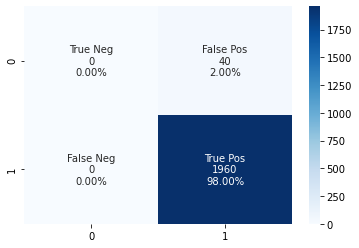

In [123]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                con.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     con.flatten()/np.sum(con)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(con, annot=labels, fmt='', cmap='Blues')


In [124]:
from sklearn.metrics import classification_report
matrix = classification_report(Y_test[3000:5000],y_hat,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1960
           0       0.00      0.00      0.00        40

    accuracy                           0.98      2000
   macro avg       0.49      0.50      0.49      2000
weighted avg       0.96      0.98      0.97      2000



C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
from tensorflow import keras
model = keras.models.load_model('char_word-cnn')

In [110]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

X_sample = 'chananpk.org/wp-includes/cd/index.php'
X_sample=X_sample.lower()
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)
X_sample = tk.texts_to_sequences(X_sample)
X_sample = pad_sequences(X_sample, padding='post', maxlen=182)
#y_sample = model.predict(X_sample).flatten().tolist()
#X_sample=X_sample[:-1]
#print('Prediction: ',y_sample)

In [112]:
X2_sample = 'chananpk.org/wp-includes/cd/index.php'
X2_sample=clean_str(X2_sample)
tk = Tokenizer(num_words=True, oov_token='UNK')
tk.fit_on_texts(X2_sample)
X2_sample = tk.texts_to_sequences(X2_sample)
X2_sample = pad_sequences(X2_sample, padding='post', maxlen=182)


In [114]:
y_sample = model1.predict([X_sample,X2_sample]).flatten().tolist()
#print(y_sample)

In [115]:
ans=np.argmax(y_sample)
print(ans)

1


In [104]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

X_sample = 'politicalgraveyard.com/bio/morris.html'
X_sample=clean_str(X_sample)
tk = Tokenizer(num_words=True, oov_token='UNK')
tk.fit_on_texts(X_sample)
X_sample = tk.texts_to_sequences(X_sample)
X_sample = pad_sequences(X_sample, padding='post', maxlen=182)
#y_sample = model.predict(X_sample).flatten().tolist()

X2_sample = 'politicalgraveyard.com/bio/morris.html'
X2_sample=clean_str(X2_sample)
tk = Tokenizer(num_words=True, oov_token='UNK')
tk.fit_on_texts(X2_sample)
X2_sample = tk.texts_to_sequences(X2_sample)
X2_sample = pad_sequences(X2_sample, padding='post', maxlen=182)

y_sample = model1.predict([X_sample,X2_sample]).flatten().tolist()
ans=np.argmax(y_sample)
print(ans)

0


In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

X_sample = 'morris.html'
X_sample=clean_str(X_sample)
tk = Tokenizer(num_words=True, oov_token='UNK')
tk.fit_on_texts(X_sample)
X_sample = tk.texts_to_sequences(X_sample)
X_sample = pad_sequences(X_sample, padding='post', maxlen=182)
#y_sample = model.predict(X_sample).flatten().tolist()

X2_sample = 'morris.html'
X2_sample=clean_str(X2_sample)
tk = Tokenizer(num_words=True, oov_token='UNK')
tk.fit_on_texts(X2_sample)
X2_sample = tk.texts_to_sequences(X2_sample)
X2_sample = pad_sequences(X2_sample, padding='post', maxlen=182)

y_sample = model.predict([X_sample,X2_sample]).flatten().tolist()
ans=np.argmax(y_sample)
print(ans)

0
